In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from outliers import smirnov_grubbs as grubbs

In [5]:
# importando el dataset preprocesado.
data_set_elloa =pd.read_csv('train.csv', sep=',')
data_set_elloa.head()

,id,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,114,47,22.0300,84,2.869,0.5900,26.6500,38.0400,3.3200,191.720,1
1,104,75,30.4800,152,7.010,2.6283,50.5300,10.0600,11.7300,99.450,2
2,90,25,22.8600,82,4.090,0.8273,20.4500,23.6700,5.1400,313.730,1
3,8,54,24.2188,86,3.730,0.7913,8.6874,3.7052,10.3446,635.049,2
4,9,69,35.0927,101,5.646,1.4066,83.4821,6.7970,82.1000,263.499,1


# verifica as correlações entre os atributos

In [60]:
data_set_elloa.corr(method='pearson')
#data_set_elloa.corr("pearson")["BMI"]["Leptin"]
#data_set_elloa.corr("pearson")["Glucose"]["HOMA"]
#data_set_elloa.corr("pearson")["Insulin"]["HOMA"]

#principais correlações entre atributos:
# BMI e  Leptin
# Glucose e HOMA
#Insulin e HOMA


,id,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
id,1.000000,-0.070272,0.001297,-0.019828,0.125470,0.054057,-0.092984,0.091425,-0.083560,0.236116,0.092718
Age,-0.070272,1.000000,0.046243,0.255007,-0.014352,0.070058,0.057603,-0.195921,0.084157,-0.031636,-0.007412
BMI,0.001297,0.046243,1.000000,0.120155,0.110721,0.090896,0.641596,-0.326366,0.226390,0.227154,-0.119540
Glucose,-0.019828,0.255007,0.120155,1.000000,0.472247,0.648375,0.320182,-0.108719,0.236396,-0.007520,0.376309
Insulin,0.125470,-0.014352,0.110721,0.472247,1.000000,0.939592,0.244273,-0.002093,0.150592,0.080775,0.280550
HOMA,0.054057,0.070058,0.090896,0.648375,0.939592,1.000000,0.284644,-0.021025,0.237270,0.107946,0.276364
Leptin,-0.092984,0.057603,0.641596,0.320182,0.244273,0.284644,1.000000,-0.134664,0.384415,0.058682,0.003493
Adiponectin,0.091425,-0.195921,-0.326366,-0.108719,-0.002093,-0.021025,-0.134664,1.000000,-0.250135,-0.154118,-0.009586
Resistin,-0.083560,0.084157,0.226390,0.236396,0.150592,0.237270,0.384415,-0.250135,1.000000,0.285751,0.176416
MCP.1,0.236116,-0.031636,0.227154,-0.007520,0.080775,0.107946,0.058682,-0.154118,0.285751,1.000000,0.039997


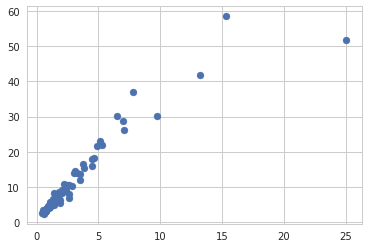

In [65]:
#seria interesante eliminar um dos dois pois eles estaointimamente correlacionados(quase linear)
X = data_set_elloa['HOMA']
Y = data_set_elloa['Insulin']
plt.scatter(X,Y)
plt.show()

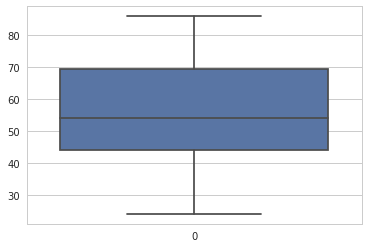

In [42]:
#data_set_elloa.isnull().sum()
#id	Age	BMI	Glucose	Insulin	HOMA	Leptin	Adiponectin	Resistin	MCP.1	Classification
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
dt=data_set_elloa['Age']
sns.boxplot(data=dt);


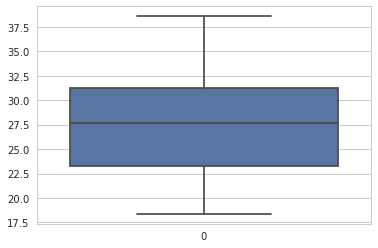

In [43]:
dt=data_set_elloa['BMI']
sns.boxplot(data=dt);

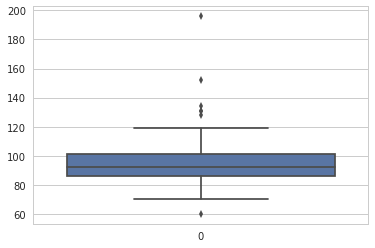

In [44]:
dt=data_set_elloa['Glucose']
sns.boxplot(data=dt);

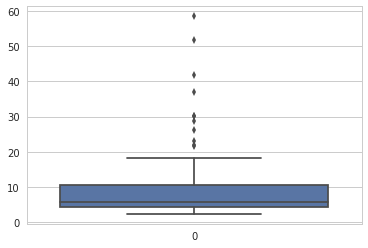

In [45]:
#HOMA	Leptin	Adiponectin	Resistin	MCP.1	Classification
dt=data_set_elloa['Insulin']
sns.boxplot(data=dt);

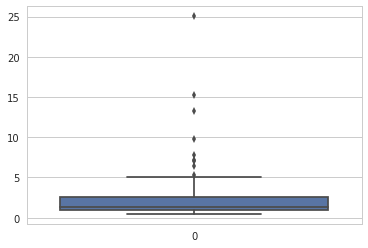

In [46]:
#Leptin	Adiponectin	Resistin	MCP.1	Classification
dt=data_set_elloa['HOMA']
sns.boxplot(data=dt);

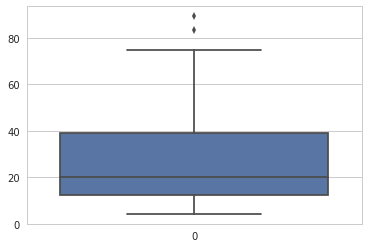

In [47]:
#	Adiponectin	Resistin	MCP.1	Classification
dt=data_set_elloa['Leptin']
sns.boxplot(data=dt);

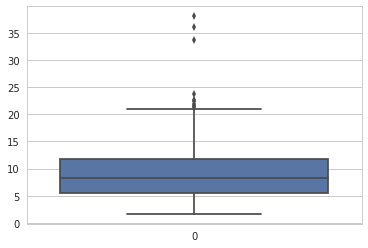

In [48]:
#		Resistin	MCP.1	Classification
dt=data_set_elloa['Adiponectin']
sns.boxplot(data=dt);

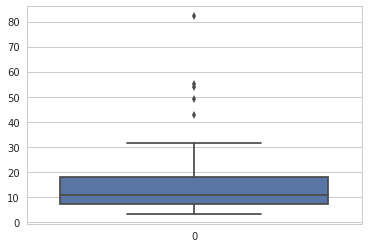

In [49]:
#			MCP.1	Classification
dt=data_set_elloa['Resistin']
sns.boxplot(data=dt);

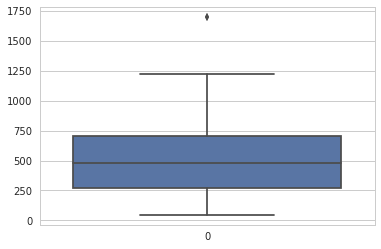

In [50]:
#				Classification
dt=data_set_elloa['MCP.1']
sns.boxplot(data=dt);

# TODO REMOVER OS OUTLIER´S ACIMA

Abaixo eu verifico os valores discrepantes usando o teste de valor extremo grubbs

In [27]:
grubbs.test(data_set_elloa['BMI'],alpha=0.05)

In [25]:
#id	Age	BMI	Glucose	Insulin	HOMA	Leptin	Adiponectin	Resistin	MCP.1	Classification
grubbs.min_test_indices(data_set_elloa['MCP.1'],alpha=0.05) #retorna os indices dos valores discrepantes

[]

In [24]:
grubbs.max_test_indices(data_set_elloa['MCP.1'],alpha=0.05) #retorna os indices dos valores discrepantes

[75, 88]

In [ ]:
grubbs.max_test_indices(data_set_elloa['MCP.1'],alpha=0.05) #retorna dos valores discrepantes
grubbs.max_test_indices(data_set_elloa['Resistin'],alpha=0.05) #retorna dos valores discrepantes
grubbs.max_test_indices(data_set_elloa['Adiponectin'],alpha=0.05) #retorna dos valores discrepantes
grubbs.max_test_indices(data_set_elloa['Leptin'],alpha=0.05) #retorna dos valores discrepantes
grubbs.max_test_indices(data_set_elloa['HOMA'],alpha=0.05) #retorna dos valores discrepantes
grubbs.max_test_indices(data_set_elloa['Insulin'],alpha=0.05) #retorna dos valores discrepantes
grubbs.max_test_indices(data_set_elloa['Glucose'],alpha=0.05) #retorna dos valores discrepantes

In [1]:
#deleta os valores discrepantes

# descobre os principais atributos

In [67]:
X_train = data_set_elloa.drop(['id','Classification'], axis=1)
Y_train = data_set_elloa['Classification']

In [18]:
modelo = ExtraTreesClassifier()
era = RFE(modelo, 6)  # número de atributos a seleccionar
era = era.fit(X_train, Y_train)

In [19]:
columnas = list(X_train.columns.values)
atrib = era.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Resistin']

In [124]:
iris = pd.read_csv('/home/wilson/Desktop/elloa_rna/classification-seeds-dataset-master/codigos/pca/iris2.csv', sep=',')
y = iris['species']

target_2=[]

for i in y:
    l=[]
    l.append(i)
    target_2.append(l)
#print(target_2)


target_serie = pd.Series( (v[0] for v in target_2) )

#print(type(target_serie))
iris = pd.read_csv('/home/wilson/Desktop/elloa_rna/classification-seeds-dataset-master/codigos/pca/iris2.csv', sep=',')

y = iris['species']
print(type(y))



<class 'pandas.core.series.Series'>


In [122]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
'''
df = pd.read_csv('winequality-red.csv', sep=';')


  


y = np.array(df['make'])
X = np.array(df.drop('make', axis=1))
'''

iris = datasets.load_iris()

#y = iris.target
#y = target_serie

iris = pd.read_csv('/home/wilson/Desktop/elloa_rna/classification-seeds-dataset-master/codigos/pca/iris2.csv', sep=',')

y = iris['species']
X = iris



fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('4', 0), ('5', 1), ('6', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

ValueError: invalid entry in choice array

ValueError: posx and posy should be finite values